# Exercício 2 - SME0130 - Redes Complexas

### Aluno: Luciano Augusto Campagnoli da Silva
### Número USP: 9313367

Importar bibliotecas.

In [1]:
from numpy  import *
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

Ler grafos.

##### Hamsterster

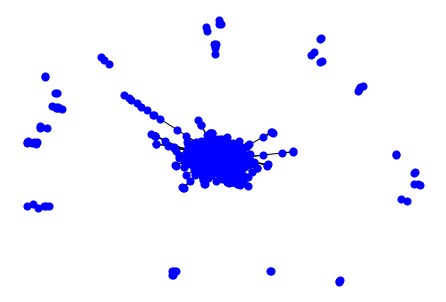

In [3]:
G= nx.read_edgelist("data/data/hamsterster.txt", nodetype=int, data=(('weight',float),))
# If the data file has only two columns, use this:
#G= G=nx.read_edgelist("data/powergrid.txt", nodetype=int)
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color="b", node_size=50, with_labels=False)
G = G.to_undirected()
G.remove_edges_from(nx.selfloop_edges(G))
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])
G = nx.convert_node_labels_to_integers(G, first_label=0)

##### Advogato

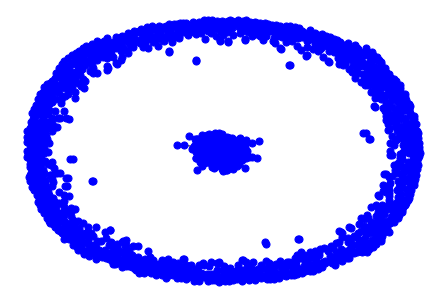

In [4]:
G2= nx.read_edgelist("data/data/advogato.txt", nodetype=int, data=(('weight',float),))
# If the data file has only two columns, use this:
#G2= G2=nx.read_edgelist("data/powergrid.txt", nodetype=int)
pos = nx.spring_layout(G2)
nx.draw(G2, pos, node_color="b", node_size=50, with_labels=False)
G2 = G2.to_undirected()
G2.remove_edges_from(nx.selfloop_edges(G2))
G2cc = sorted(nx.connected_components(G2), key=len, reverse=True)
G2 = G2.subgraph(G2cc[0])
G2 = nx.convert_node_labels_to_integers(G2, first_label=0)

##### USAirport500

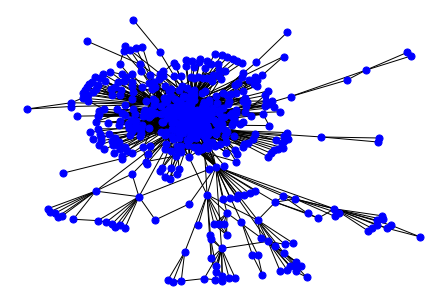

In [5]:
G3= nx.read_edgelist("data/data/USairport500.txt", nodetype=int, data=(('weight',float),))
# If the data file has only two columns, use this:
#G3= G3=nx.read_edgelist("data/powergrid.txt", nodetype=int)
pos = nx.spring_layout(G3)
nx.draw(G3, pos, node_color="b", node_size=50, with_labels=False)
G3 = G3.to_undirected()
G3.remove_edges_from(nx.selfloop_edges(G3))
G3cc = sorted(nx.connected_components(G3), key=len, reverse=True)
G3 = G3.subgraph(G3cc[0])
G3 = nx.convert_node_labels_to_integers(G3, first_label=0)

##### Adjacência de palavras

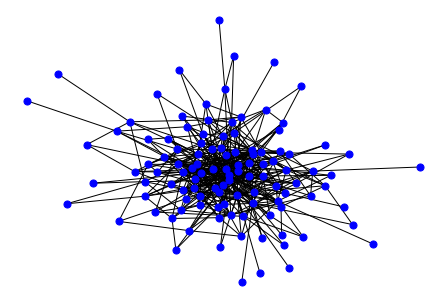

In [6]:
G4= nx.read_edgelist("data/data/word_adjacencies.txt", nodetype=int, data=(('weight',float),))
# If the data file has only two columns, use this:
#G4= G4=nx.read_edgelist("data/powergrid.txt", nodetype=int)
pos = nx.spring_layout(G4)
nx.draw(G4, pos, node_color="b", node_size=50, with_labels=False)
G4 = G4.to_undirected()
G4.remove_edges_from(nx.selfloop_edges(G4))
G4cc = sorted(nx.connected_components(G4), key=len, reverse=True)
G4 = G4.subgraph(G4cc[0])
G4 = nx.convert_node_labels_to_integers(G4, first_label=0)

## Questão 1

Menor caminho médio.

In [7]:
if nx.is_connected(G) == True:
    l = nx.average_shortest_path_length(G)
    print("Average shortest path length:", "%3.4f"%l)
else:
    print("The graph has more than one connected component")


Average shortest path length: 3.4526


Diâmetro da rede.

In [8]:
d = nx.diameter(G)
print('Network diameter:', d)

Network diameter: 14


Alternativa correta: **a**.

## Questão 2

Menor caminho médio.

In [9]:
if nx.is_connected(G2) == True:
    l = nx.average_shortest_path_length(G2)
    print("Average shortest path length:", "%3.4f"%l)
else:
    print("The graph has more than one connected component")


Average shortest path length: 3.2747


Distribuição dos menores caminhos.

In [98]:
def shortest_paths_distribution(G):
    # Numbers of vertexes and edges of the graph
    N = len(G)
    M = G.number_of_edges()
    
    if nx.is_connected(G) == True:
        D = zeros(shape=(N,N)) # D is the matrix of distances
        vl = []
        for i in np.arange(0,N):
            for j in np.arange(i+1, N):
                if(i != j):
                    aux = nx.shortest_path(G,i,j)
                    dij = len(aux)-1
                    D[i][j] = dij
                    D[j][i] = dij
                    vl.append(dij)
        
        # Greatest shortest path on network
        d = nx.diameter(G)
        
        # Histogram of shortest paths distribution
        #x = range(0,d+1)
        #plt.hist(vl, bins = x, density=True)
        #plt.title("Distribution of the geodesic distances", fontsize=20)
        #plt.ylabel("P(l)", fontsize=15)
        #plt.xlabel("Shortest path length (l)", fontsize=15)
        #plt.grid(True)
        #plt.savefig('av_short_path.eps')
        #plt.show(True)
        
        # Distribution of probabilities
        maxl = max(vl)
        lvalues= np.arange(0,maxl + 1) # possible values of k
        Pl = np.zeros(maxl + 1) # P(k)
        for l in vl:
            Pl[l] = Pl[l] + 1
        Pl = Pl/sum(Pl) # the sum of the elements of P(k) must to be equal to one
        
        return lvalues, Pl

    else:
        print("The graph has more than one connected component")

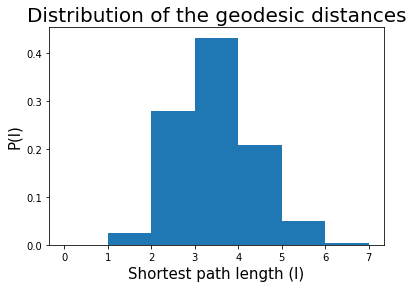

In [88]:
l, Pl = shortest_paths_distribution(G3)

In [90]:
len(Pl)

8

Cálculo do segundo momento da distribuição e da variância dos menores caminhos.

In [91]:
def moment_of_shortest_path_distribution(G,m):
    l,Pl = shortest_paths_distribution(G)
    M = sum((l**m)*Pl)
    return M

In [99]:
variance = moment_of_shortest_path_distribution(G3,2) - moment_of_shortest_path_distribution(G3,1)**2
print("Variance of the shortest path = ", variance)

Variance of the shortest path =  0.8175467946875727


Alternativa correta: **b**.

## Questão 3

Cálculo da entropia de Shannon.

In [102]:
def shannon_entropy(G):
    k,Pk = shortest_paths_distribution(G)
    H = 0
    for p in Pk:
        if(p > 0):
            H = H - p*math.log(p, 2)
    return H

In [103]:
H = shannon_entropy(G3)
print("Shannon Entropy = ", "%3.4f"%H)

Shannon Entropy =  1.8837


Alternativa correta: **e**.

## Questão 4

Cálculo da assortatividade.

In [106]:
CC = nx.degree_assortativity_coefficient(G2)
print("Assortativity = ","%3.4f"%CC)

Assortativity =  -0.0957


In [109]:
def assortativity(G):
    ki = []
    kj = []
    for i in range(0,len(G.nodes())):
        for j in range(0, len(G.nodes())):
            if(G.has_edge(i,j) == True):
                ki.append(G.degree(i))
                kj.append(G.degree(j))

    from scipy.stats import pearsonr
    # calculate Pearson's correlation
    corr, _ = pearsonr(ki, kj)
    print('Pearsons correlation: %.3f' % corr)

In [111]:
assortativity(G2)

Pearsons correlation: -0.096


Alternativa correta: **c**.

## Questão 5

Grau médio dos vizinhos.

In [113]:
knn = []
for i in G4.nodes():
    aux =  nx.average_neighbor_degree(G4, nodes = [i])
    knn.append(float(aux[i]))
knn = np.array(knn)
print("Average degree of the neighborhood of the network:", "%3.2f"%mean(knn))

Average degree of the neighborhood of the network: 14.76


Grau de cada nó.

In [115]:
vk = dict(G4.degree())
vk = list(vk.values())
print(vk)

[3, 14, 33, 9, 17, 12, 49, 14, 9, 13, 8, 6, 3, 28, 1, 10, 7, 10, 5, 8, 15, 14, 11, 15, 12, 7, 7, 7, 15, 13, 7, 7, 5, 2, 1, 5, 21, 7, 1, 4, 28, 2, 2, 7, 7, 6, 10, 5, 11, 7, 3, 12, 10, 9, 12, 10, 10, 6, 1, 10, 4, 13, 5, 2, 2, 5, 2, 6, 6, 3, 12, 6, 10, 12, 13, 6, 7, 6, 4, 7, 3, 8, 1, 6, 2, 9, 5, 6, 5, 3, 4, 5, 5, 6, 4, 3, 5, 6, 2, 1, 3, 2, 3, 1, 6, 2, 3, 2, 1, 1, 2, 1]


Relação entre grau médio dos vizinhos e grau do vértice.

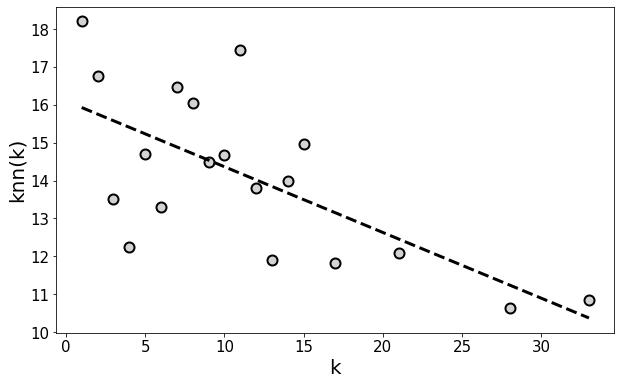

In [117]:
knnk = list()
ks = list()
for k in arange(np.min(vk), np.max(vk)):
    aux = vk == k
    if(len(knn[aux]) > 0):
        av_knn = mean(knn[aux]) #average clustering among all the nodes with degree k
        knnk.append(av_knn)
        ks.append(k)
fig= plt.figure(figsize=(10,6))

plt.plot(ks, knnk, '-o', color='gray',markersize=10, linewidth=0,
         markerfacecolor='lightgray',
         markeredgecolor='black',
         markeredgewidth=2)
#plt.loglog(ks,knnk,'bo',basex=10,basey=10)
#plt.title("Average neighborhood connectivity vs degree")
plt.ylabel("knn(k)", fontsize = 20)
plt.xlabel("k", fontsize = 20)
#plt.savefig('knnk.eps')

# determine best fit line
par = np.polyfit(ks, knnk, 1, full=True)
slope=par[0][0]
intercept=par[0][1]
xl = [min(ks), max(ks)]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, '--', linewidth=3, color='black')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('knn.eps') #save the figure into a file
plt.show(True)

Valor da correlação entre k e knn(k).

In [118]:
rho = corrcoef(ks, knnk)[0,1]
print('Pearson correlation coefficient:', rho)

Pearson correlation coefficient: -0.6753041480047248


Coeficiente de Spearman.

In [120]:
from scipy import stats
s = stats.spearmanr(ks, knnk)
print('Spearman rank correlation coefficient:', s)

Spearman rank correlation coefficient: SpearmanrResult(correlation=-0.6035087719298246, pvalue=0.00622186140199637)


Alternativa correta: **b**.